In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# create a 3x4 matrix, range from 0 to 11
for row in np.arange(12).reshape(3, 4):
    print(row.mean())

1.5
5.5
9.5


In [3]:
# create a 5x5 indentify matrix and swap row 2 and row 3
imat = np.eye(5)
imat[[1, 2]] = imat[[2, 1]]
print(imat)

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [4]:
# create a random 4x5 matrix, range from 10 to 50.finally, print the position index of the value graater than 40
rmat = np.random.randint(10, 50, (4, 5))
print(rmat)
x,y=np.where(rmat > 40)[0],np.where(rmat > 40)[1]
for i in range(len(x)):
    print("x=%d y=%d value=%d"%(x[i]+1, y[i]+1, rmat[x[i], y[i]]))

[[22 35 20 13 48]
 [27 41 42 40 38]
 [46 22 40 15 10]
 [40 24 25 36 36]]
x=1 y=5 value=48
x=2 y=2 value=41
x=2 y=3 value=42
x=3 y=1 value=46


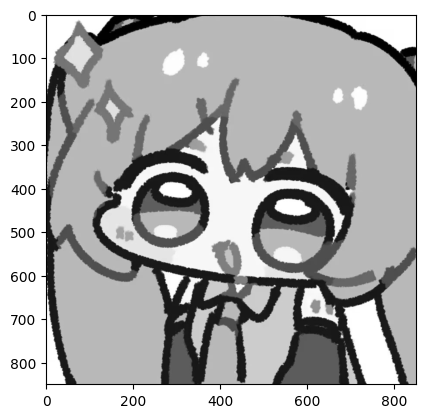

In [5]:
# read an image "exmple.jpg" and show the gray version
example = Image.open("example-miku.jpg")
gray_example = example.convert("L")
plt.imshow(gray_example, cmap="gray")

example.close()

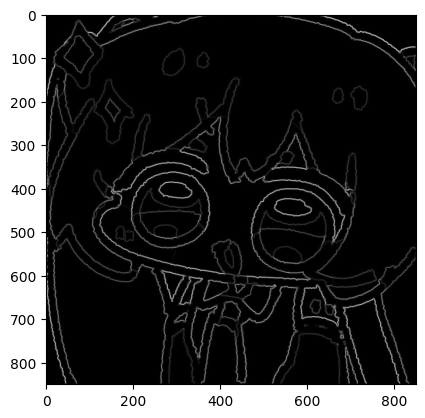

In [6]:
# read an image "example.png",then use sobel filter to get the edge of the image
G_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
G_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

example = Image.open("example-miku.jpg")
example = example.convert("L")
example = np.array(example)
height, width = example.shape

result = np.zeros((height, width))
for i in range(1, height - 1):
    for j in range(1, width - 1):
        result[i, j] = np.sqrt((np.sum(G_x * example[i - 1:i + 2, j - 1:j + 2])) ** 2 + (np.sum(G_y * example[i - 1:i + 2, j - 1:j + 2])) ** 2)

plt.imshow(result, cmap="gray")

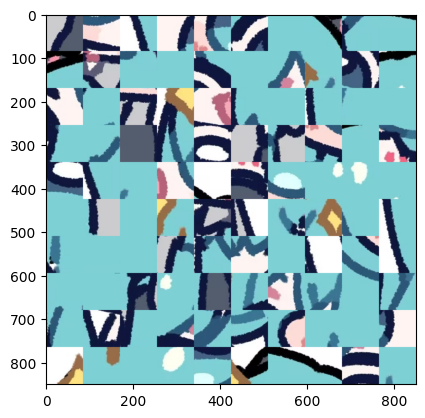

In [10]:
# read an image "example.jpg" and split to NxN patches,then shuffle the patches and show the result 
N = 10
example = Image.open("example-miku.jpg")
example = example.convert("RGB")
example = np.array(example)

height, width, _ = example.shape
patch_size = (height//N,width//N)
patches = []

for i in range(0, height, patch_size[0]):
    for j in range(0, width, patch_size[1]):
        patch = example[i:i+patch_size[0], j:j+patch_size[1]]
        patches.append(patch)

np.random.shuffle(patches)

shuffled_image = np.zeros_like(example)
patch_idx = 0
for i in range(0, height, patch_size[0]):
    for j in range(0, width, patch_size[1]):
        shuffled_image[i:i+patch_size[0], j:j+patch_size[1]] = patches[patch_idx]
        patch_idx += 1

plt.imshow(shuffled_image)
plt.show()